In [33]:
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt

When using Cantera, the first thing you usually need is an object representing some phase of matter. Here, we'll create a gas mixture:

In [34]:
gas1 = ct.Solution('gri30.cti')

To view the state of the mixture, *call* the `gas1` object as if it were a function:

In [35]:
gas1()


  gri30:

       temperature             300  K
          pressure          101325  Pa
           density       0.0818891  kg/m^3
  mean mol. weight         2.01588  amu

                          1 kg            1 kmol
                       -----------      ------------
          enthalpy           26470        5.336e+04     J
   internal energy     -1.2109e+06       -2.441e+06     J
           entropy           64914        1.309e+05     J/K
    Gibbs function     -1.9448e+07        -3.92e+07     J
 heat capacity c_p           14312        2.885e+04     J/K
 heat capacity c_v           10187        2.054e+04     J/K

                           X                 Y          Chem. Pot. / RT
                     -------------     ------------     ------------
                H2              1                1         -15.7173
     [  +52 minor]              0                0



## Setting the State

The state of the object can easily be changed. For example:

In [36]:
gas1.TP = 1200, 101325

sets the temperature to 1200 K and the pressure to 101325 Pa (Cantera always uses SI units + kmol). After this statement, calling `gas1()` results in:

In [37]:
gas1()


  gri30:

       temperature            1200  K
          pressure          101325  Pa
           density       0.0204723  kg/m^3
  mean mol. weight         2.01588  amu

                          1 kg            1 kmol
                       -----------      ------------
          enthalpy      1.3296e+07         2.68e+07     J
   internal energy      8.3462e+06        1.682e+07     J
           entropy           85228        1.718e+05     J/K
    Gibbs function     -8.8978e+07       -1.794e+08     J
 heat capacity c_p           15378          3.1e+04     J/K
 heat capacity c_v           11253        2.269e+04     J/K

                           X                 Y          Chem. Pot. / RT
                     -------------     ------------     ------------
                H2              1                1         -17.9775
     [  +52 minor]              0                0



Properties may be also **read** independently, such as

or

In [38]:
gas1.h

13295567.68419188

or together:

In [11]:
gas1.UV

(8346188.494954425, 48.8465747765848)

You can also set composition:

In [14]:
gas1.TPX = 1200, 101325, "CH4:1, O2:2, N2:7.52"

## Chemical Equilibrium

To set a gas mixture to a state of chemical equilibrium, use the `equilibrate` method:

In [26]:
g = ct.Solution("gri30.cti",'gri30_mix')
g.TPX = 300.0, ct.one_atm, "CH4:0.95, O2:2, N2:7.52"
g.equilibrate("TP")
g()


  gri30_mix:

       temperature             300  K
          pressure          101325  Pa
           density         1.12477  kg/m^3
  mean mol. weight         27.6886  amu

                          1 kg            1 kmol
                       -----------      ------------
          enthalpy     -2.8724e+06       -7.953e+07     J
   internal energy     -2.9624e+06       -8.203e+07     J
           entropy          7226.7        2.001e+05     J/K
    Gibbs function     -5.0404e+06       -1.396e+08     J
 heat capacity c_p          1106.5        3.064e+04     J/K
 heat capacity c_v          806.22        2.232e+04     J/K

                           X                 Y          Chem. Pot. / RT
                     -------------     ------------     ------------
                O2      0.0095511        0.0110379         -29.3248
               H2O       0.181471         0.118072         -121.367
               CO2      0.0907354          0.14422         -185.873
               NO2    

## Generally speaking, this mode can be used to debug and understand a particular mechanism.

For Example, to see the temperature dependence of a property such as the viscosity:

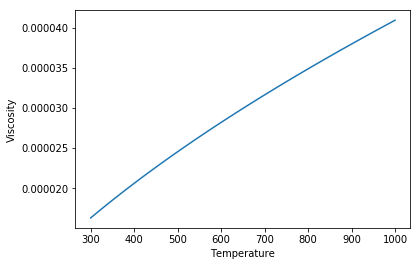

In [30]:
Temps = np.linspace(300,1000,50)
mu = np.zeros_like(Temps)
for i,T in enumerate(Temps):
    g.TP = T, None
    mu[i] = g.viscosity
    
plt.plot(Temps,mu)
plt.xlabel('Temperature')
plt.ylabel('Viscosity')
plt.show()